In [2]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Create an empty dictionary that will hold delayed trains
delayed_trains = {}
    
# Target User = A Twitter account that sends tweets regarding delayed trains
target_user = "SubwayStats"

# Loop through 50 pages of statuses
for x in range(1, 51):

    # Get all tweets from home feed. Set pagination to "x"
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Break tweet text into a list of lowercase words
        tweet_text = tweet["text"].lower().split(" ")
        
        # Print the tweet text only if it contains the word "delays" or "change"
        if("delays" in tweet_text or "change" in tweet_text):
            print(tweet["text"].lower())
            
            # Loop through hashtags to extract the train names
            # Hint: try ["entities"] and ["hashtags]
            for hashtag in tweet["entities"]["hashtags"]:
              
                # Extract the hashtag's text, and set it to lower case
                train_name = hashtag["text"].lower()
                
                # Remove all hashtags that are extraneous
                if (train_name != "nycsubway" and train_name != "mta" and train_name != "nyc"):
                                        
                    # If train is new, i.e. not in the dictionary, add it to the dictionary, and set its value to 1
                    if(train_name not in delayed_trains):
                        delayed_trains[train_name] = 1
                    
                    # If it already exists add 1 to its count
                    else:    
                        delayed_trains[train_name] += 1

delays reported on #7train  #mta https://t.co/jh4u3cbejs
#jtrain and #ztrain have delays [j] trains will not run between chambers st and broad st in manhattan #nycsubway https://t.co/jh4u3ctg8s
delays reported on #1train #2train and #3train sep 17 - 20, mon to thu, 9:45 pm to 11:45 pm[3] trains will not run… https://t.co/uqjvnkyagr
#1train #2train and #3train have service change sep 17 - 20, mon to thu, 9:45 pm to 11:45 pm[3] trains will not run… https://t.co/0mqgn2eaye
delays reported on #4train #5train and #6train [4] trains replace the [3] between atlantic av-barclays ctr and new… https://t.co/bcksyb3tvx
delays on #atrain #ctrain and #etrain [a] [c] trains provide alternate service #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have service change sep 17 - 20, mon to thu, beginning 8:30 pm each night[5] service en… https://t.co/wlu6zou0te
#ntrain #qtrain #rtrain #wtrain have delays sep 18 - 20, tue to thu  &amp;bull;  sep 24 - 27, mon to thu, 8:30 pm to 11… https://t.co/eg

delays on #ntrain #qtrain #rtrain #wtrain sep 18 - 21, tue to fri, from 11:30 pm to 5 am96 st-bound [q] trains skip… https://t.co/2t7glyydai
#ntrain #qtrain #rtrain #wtrain have service change sep 18 - 21, tue to fri, from 11:30 pm to 5 am96 st-bound [q] t… https://t.co/0tzvrcsrxx
#ntrain #qtrain #rtrain #wtrain have delays sep 18 - 21, tue to fri, from 11:30 pm to 5 am96 st-bound [q] trains sk… https://t.co/yqrkwuze9w
service change reported on #ntrain #qtrain #rtrain #wtrain sep 18 - 21, tue to fri, from 11:30 pm to 5 am96 st-boun… https://t.co/z6z4y1xqxp
#ntrain #qtrain #rtrain #wtrain have service change sep 18 - 21, tue to fri, from 11:30 pm to 5 am96 st-bound [q] t… https://t.co/ynqoga5kzs
#btrain #dtrain #ftrain #mtrain have delays until sep 28, monday to fridaydowntown [b] [d] [f] [m] trains run at a… https://t.co/xb035gaqe8
service change on #btrain #dtrain #ftrain #mtrain until sep 28, monday to fridaydowntown [b] [d] [f] [m] trains run… https://t.co/xtwu3j9ujb
#btrain #dtrai

#1train #2train and #3train have service change  #mta https://t.co/jh4u3ctg8s
service change reported on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have service change  #nycsubway https://t.co/jh4u3ctg8s
delays on #ntrain #qtrain #rtrain #wtrain [n] trains are making local stops in brooklyn at 53 st and 45 st in both… https://t.co/tovcieid6e
delays reported on #jtrain and #ztrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays until sep 28, monday to fridaydowntown [b] [d] [f] [m] trains run at a… https://t.co/1wwt1gaaag
#atrain #ctrain and #etrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change [n] trains are making local stops in brooklyn at 53 st and 45 s… https://t.co/0hoqyqsafm
service change reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change until sep 28, monday to friday[m] morning rush hou

service change on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
delays reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays uptown [2] [5] trains run express from 3 av-149 st to e 180 st in the bronx… https://t.co/btvweyf10m
service change reported on #1train #2train and #3train uptown [2] [5] trains run express from 3 av-149 st to e 180… https://t.co/ammj6hcm9a
#atrain #ctrain and #etrain have service change  #nyc https://t.co/jh4u3ctg8s
delays on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change  #nycsubway https://t.co/jh4u3ctg8s
#7train have delays  #mta https://t.co/jh4u3ctg8s
delays reported on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays [d] service is rerouted between 59 st-columbus circle, manhattan and st… https://t.co/ok1xn

#ntrain #qtrain #rtrain #wtrain have service change [n] trains are making local stops in brooklyn at 53 st and 45 s… https://t.co/wjsyzmoguu
#btrain #dtrain #ftrain #mtrain have service change downtown [b] [d] [f] [m] trains run at a slower speed in the ar… https://t.co/o3ow6i54aq
#4train #5train and #6train have delays  #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have service change  #nycsubway https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays [n] trains are making local stops in brooklyn at 53 st and 45 st in bot… https://t.co/r4ol1dbqz5
#btrain #dtrain #ftrain #mtrain have delays [f] rush hour service reduced to accommodate switch work in the area of… https://t.co/zi0gb8lpxj
#ntrain #qtrain #rtrain #wtrain have service change [n] trains are making local stops in brooklyn at 53 st and 45 s… https://t.co/2dukav98hw
service change on #btrain #dtrain #ftrain #mtrain jamaica center-bound [j] and middle village-bound [m] trains skip… https://t.co/ztnuyumjpt


service change on #btrain #dtrain #ftrain #mtrain downtown [b] [d] [f] [m] trains run at a slower speed in the area… https://t.co/ifs9tv99kb
service change reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#ltrain have delays [l] service operates every 12 minutes between myrtle-wyckoff avs and rockaway pkwy in brooklyn… https://t.co/zkx9uuovrj
#4train #5train and #6train have delays  #nycsubway https://t.co/jh4u3ctg8s
service change reported on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
delays on #ntrain #qtrain #rtrain #wtrain [n] trains are making local stops in brooklyn at 53 st and 45 st in both… https://t.co/3zunrfzqaq
service change reported on #ltrain [l] service operates every 12 minutes between myrtle-wyckoff avs and rockaway pk… https://t.co/tsotope95z
#ltrain have delays [l] service operates every 12 minutes between myrtle-wyckoff avs and rockaway pkwy in brooklyn… https://t.co/2fnrpwdq4d
#4train #5train and #6train have delays  #nyc https:

#btrain #dtrain #ftrain #mtrain have service change  #nyc https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change  #nycsubway https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays [n] trains are making local stops in brooklyn at 53 st and 45 st in bot… https://t.co/jiyymaj2jb
delays on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
delays reported on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#jtrain and #ztrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
delays reported on #4train #5train and #6train brooklyn bridge-bound [6] trains skip 116, 110, 103, 96, 77, 68 and… https://t.co/es36zublbr
#4train #5train and #6train have service change brooklyn bridge-bound [6] trains skip 116, 110, 103, 96, 77, 68 and… https://t.co/yocnq1t9ew
#1train #2train and #3train have service 

#1train #2train and #3train have delays [2] and [4] trains replace the [3] between 148 st, manhattan and new lots a… https://t.co/g5qbez1cgn
delays reported on #btrain #dtrain #ftrain #mtrain [d] service is rerouted between 59 st-columbus circle, manhattan… https://t.co/8smqrd7oau
delays on #atrain #ctrain and #etrain [a] lefferts blvd shuttle runs between lefferts blvd and rockaway blvd, the l… https://t.co/podjxwttqb
#ltrain have delays  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change [d] service is rerouted between 59 st-columbus circle, manhatta… https://t.co/krbq4tugam
delays on #btrain #dtrain #ftrain #mtrain [d] service is rerouted between 59 st-columbus circle, manhattan and stil… https://t.co/d5kb6tyk2k
#1train #2train and #3train have delays [2] and [4] trains replace the [3] between 148 st, manhattan and new lots a… https://t.co/jcdlt4vly0
#btrain #dtrain #ftrain #mtrain have service change [d] service is rerouted between 59 st-columbus circl

delays reported on #btrain #dtrain #ftrain #mtrain [b] service ends early  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays [m] service ends early between 71 av, queens and essex st, manhattan… https://t.co/kqkdwlbpzc
delays on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
delays on #atrain #ctrain and #etrain  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays  #nycsubway https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change  #mta https://t.co/jh4u3ctg8s
service change reported on #1train #2train and #3train  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays [n] trains are making local stops in brooklyn at 53 st and 45 st in bot… https://t.co/oi3i3gqhra
#jtrain and #ztrain have delays  #nyc https://t.co/jh4u3ctg8s
service change on #jtrain and #ztrain  #mta https://t.co/jh4u3ctg8s
service change on #1train 

In [4]:
# Print the Train Delay counts
print(delayed_trains)

# Convert Train Delay object into a pandas series
delayed_trains_pd = pd.Series(delayed_trains)

# Preview the results
delayed_trains_pd

{'7train': 28, 'jtrain': 24, 'ztrain': 24, '1train': 121, '2train': 121, '3train': 121, '4train': 114, '5train': 114, '6train': 114, 'atrain': 105, 'ctrain': 105, 'etrain': 105, 'ntrain': 105, 'qtrain': 105, 'rtrain': 105, 'wtrain': 105, 'btrain': 148, 'dtrain': 148, 'ftrain': 148, 'mtrain': 148, 'gtrain': 5, 'ltrain': 27, 'strain': 5, 'sirtrain': 3}


7train       28
jtrain       24
ztrain       24
1train      121
2train      121
3train      121
4train      114
5train      114
6train      114
atrain      105
ctrain      105
etrain      105
ntrain      105
qtrain      105
rtrain      105
wtrain      105
btrain      148
dtrain      148
ftrain      148
mtrain      148
gtrain        5
ltrain       27
strain        5
sirtrain      3
dtype: int64

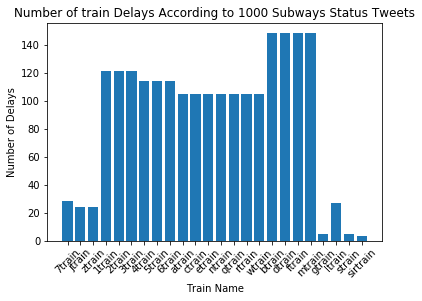

In [5]:
# Create a plot  
plt.bar(range(len(delayed_trains_pd.index)), delayed_trains_pd.values)
plt.xticks(range(len(delayed_trains_pd.index)), delayed_trains_pd.index, rotation = 45)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of train Delays According to 1000 Subways Status Tweets")
plt.show()